# 8.1 MNIST 데이터베이스
- 28*28 픽셀, 그레이스케일 이미지
- 필기체 숫자 데이터셋
- 훈련용 데이터 60,000개 / 테스트용 데이터 10,000
    - x_train: 60000\*28\*28의 배열 변수, 각 요소는 0-255 값을 갖는 정수
    - y_train: 각 요소는 0-9의 정수값, 길이가 60000인 1차원 배열 변수

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


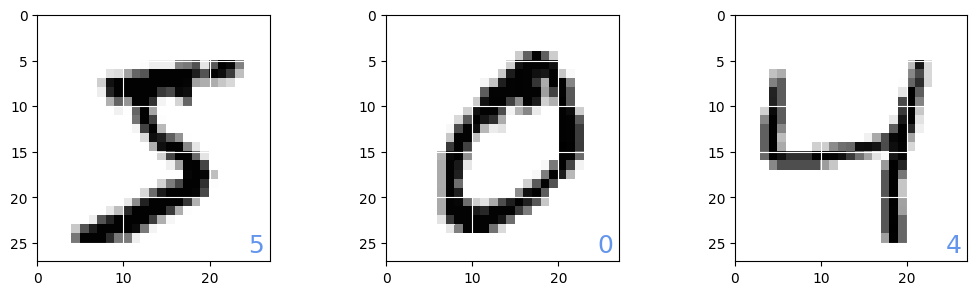

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, '%d' % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

# 8.2 2층 피드 포워드 네트워크 모델

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
y_train = to_categorical(y_train) # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test/ 255
y_test = to_categorical(y_test)

- (A) 28\*28 이미지 데이터를 784 길이의 벡터로 처리: 60000\*28\*28을 60000\*784의 배열로 변환
- (B), (C): 입력을 0~1의 실수로 처리하고 싶음
- (D): to_categorical() 함수를 사용해 1-of-K 부호화법으로 변경

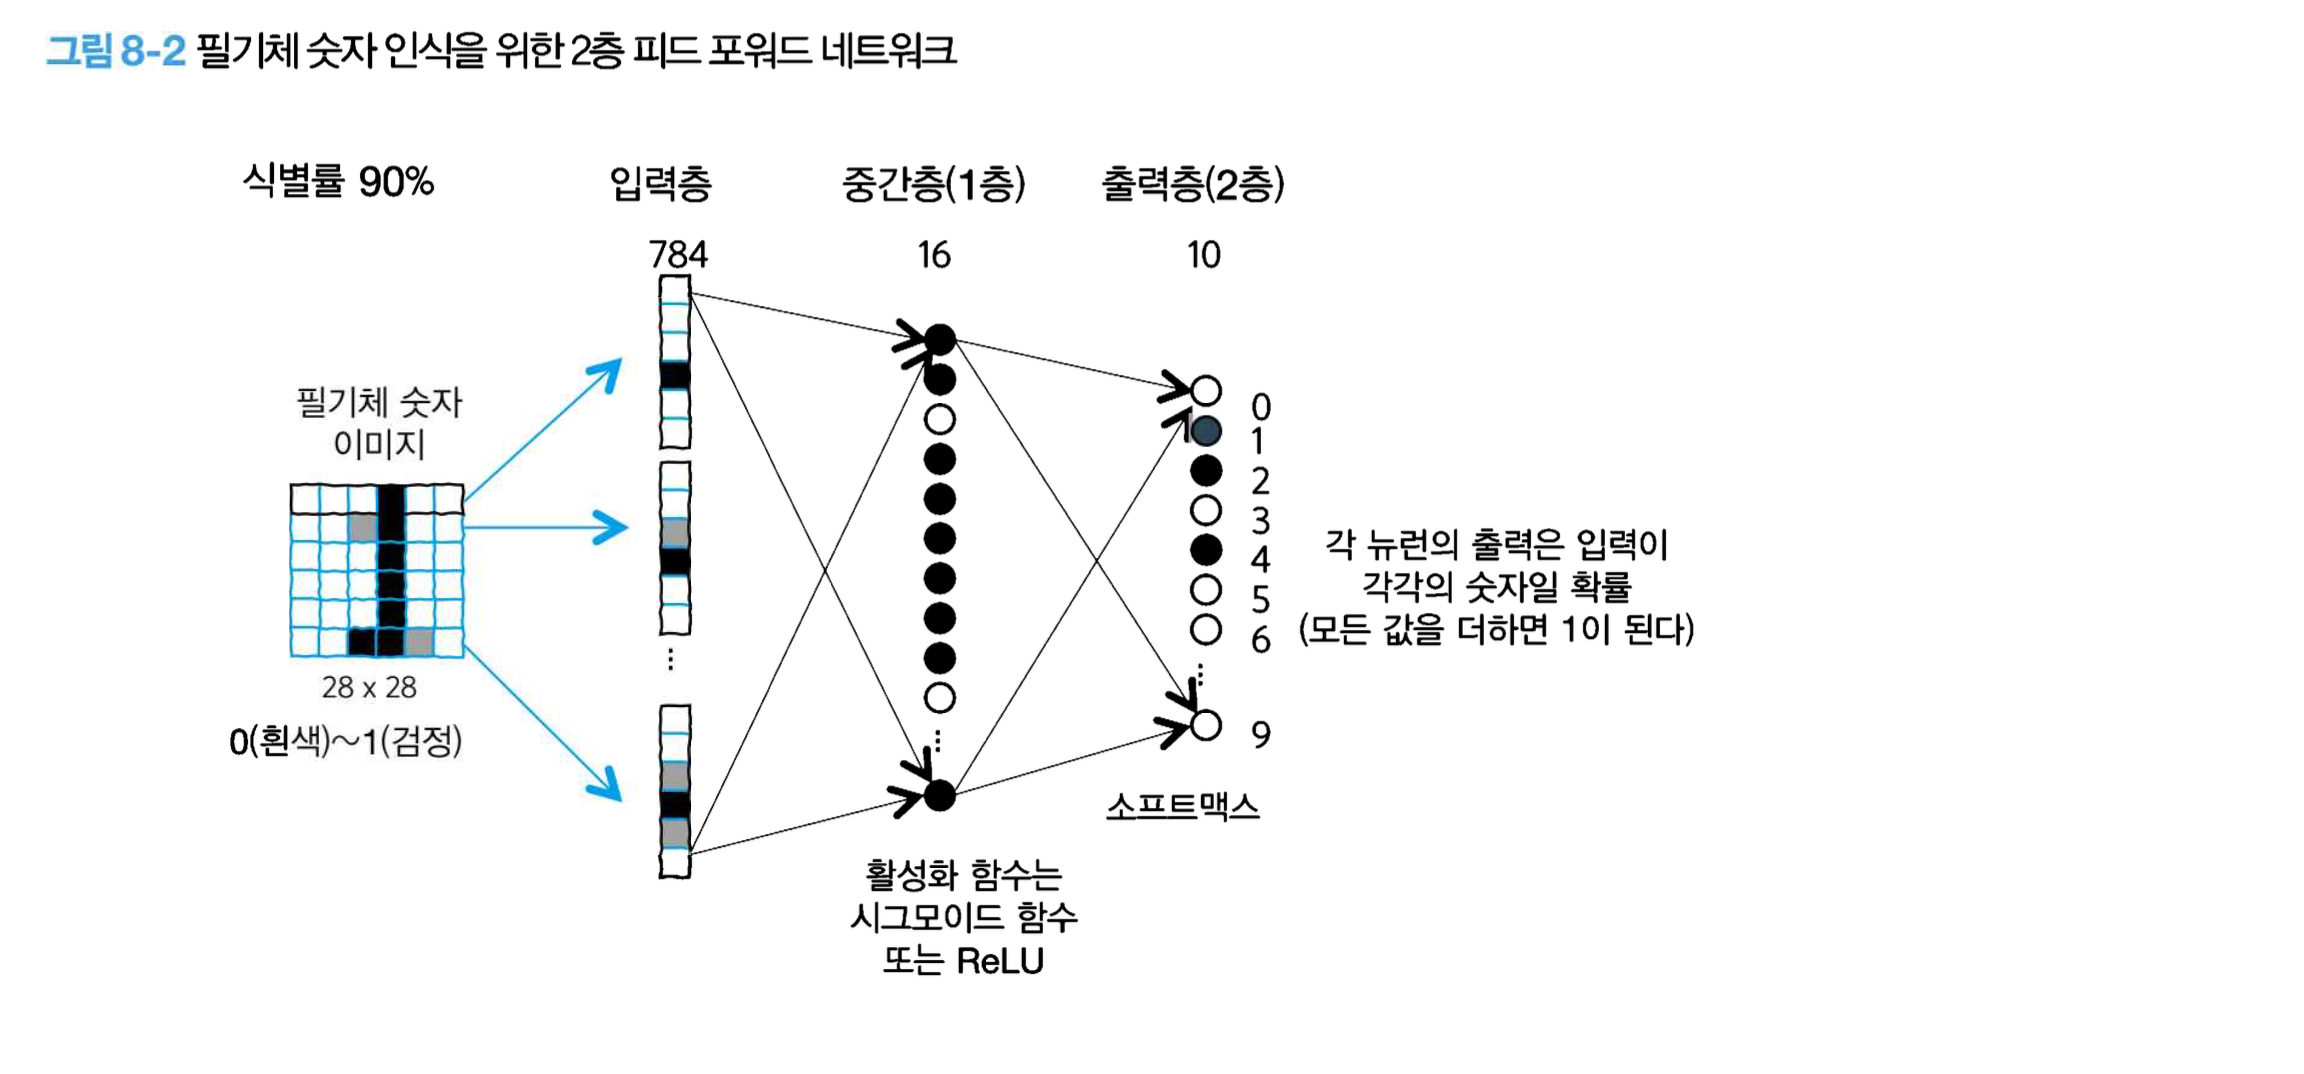

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy']) # (D)

- (A) 모델 정의
- (B) 중간층 정의: 784차원의 입력을 받음, 16개
- (C) 출력층 정의: 10개

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) #(A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Computation time: {0:.3f} sec'.format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 9ms/step - loss: 2.0299 - accuracy: 0.4311 - val_loss: 1.7527 - val_accuracy: 0.6360
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.5863 - accuracy: 0.7092 - val_loss: 1.4181 - val_accuracy: 0.7727
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 1.3038 - accuracy: 0.7948 - val_loss: 1.1760 - val_accuracy: 0.8285
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0944 - accuracy: 0.8308 - val_loss: 0.9940 - val_accuracy: 0.8517
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9360 - accuracy: 0.8488 - val_loss: 0.8558 - val_accuracy: 0.8669
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8151 - accuracy: 0.8616 - val_loss: 0.7493 - val_accuracy: 0.8775
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7216 - accuracy: 0.8712 - val_loss: 0.6666 - val_accuracy: 0.8844
Epoch 8/10
60/60 [==

- 기존 경사하강법: local minima에 빠지면 나갈 방법이 없음
- SGD: 오차를 최소화하는 방향으로 곧장 나아가는 것이 아니라 오차의 영향을 받은 것처럼 휘청거리며 진행됨
    - local minima에 빠져도 탈출할 가능성이 있음

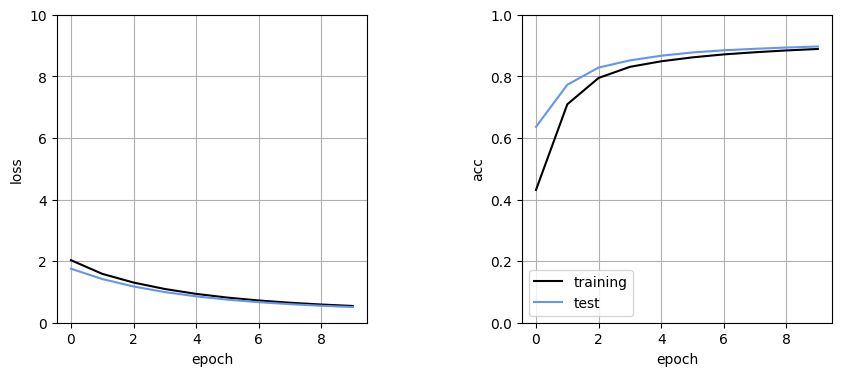

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

→ 테스트 데이터의 오차도 단조롭게 줄어들고 있으므르 오버피팅이 일어나지 않았다고 판단 가능, 정답률도 순조롭게 증가

313/313 [==============================] - 1s 1ms/step


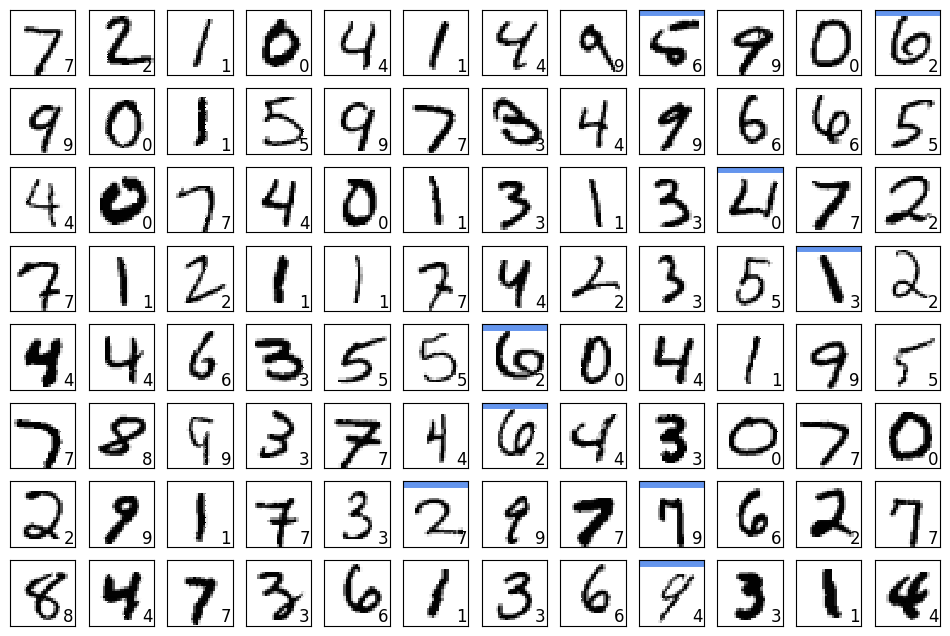

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, '%d' % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], '')
        plt.yticks([], '')

show_prediction()
plt.show()

파란 가로줄: 오답 데이터

# 8.3 ReLU 활성화 함수

0보다 크면 x를 그대로 출력 </br>
0 이하는 0을 출력하는 함수
- Gradient Vanishing 문제를 해결해줌

In [8]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) #(A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Computation time: {0:.3f} sec'.format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 13ms/step - loss: 1.5126 - accuracy: 0.5304 - val_loss: 0.9129 - val_accuracy: 0.7279
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.8291 - val_loss: 0.5163 - val_accuracy: 0.8696
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.8776 - val_loss: 0.3983 - val_accuracy: 0.8965
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8962 - val_loss: 0.3435 - val_accuracy: 0.9090
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3419 - accuracy: 0.9056 - val_loss: 0.3170 - val_accuracy: 0.9133
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.9118 - val_loss: 0.2991 - val_accuracy: 0.9158
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.9149 - val_loss: 0.2882 - val_accuracy: 0.9194
Epoch 8/10
60/60 [=

➡️ 시그모이드 함수를 사용했을 때보다 정확도 상승함 (약 4%)

313/313 [==============================] - 1s 2ms/step


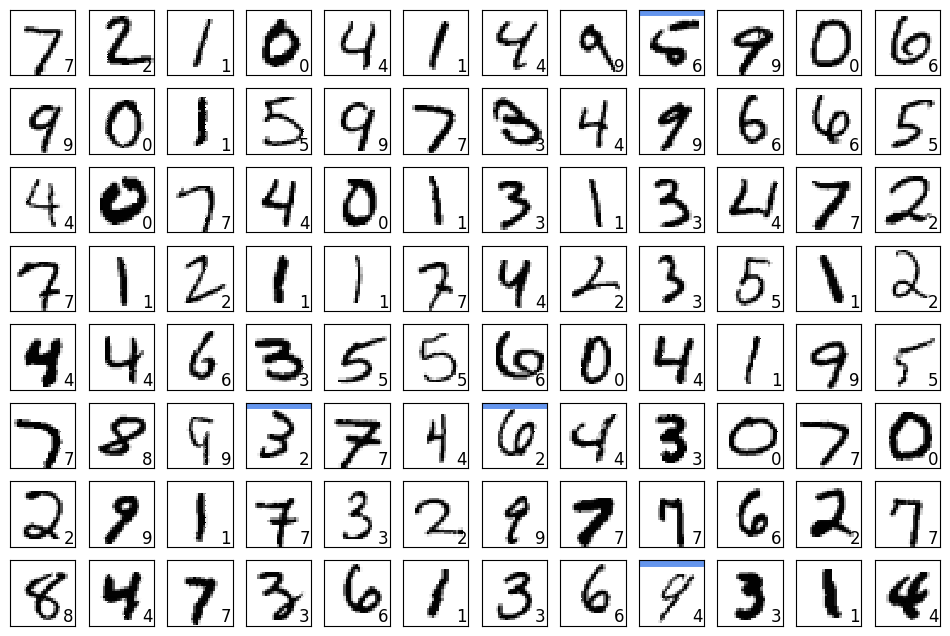

In [9]:
show_prediction()
plt.show()

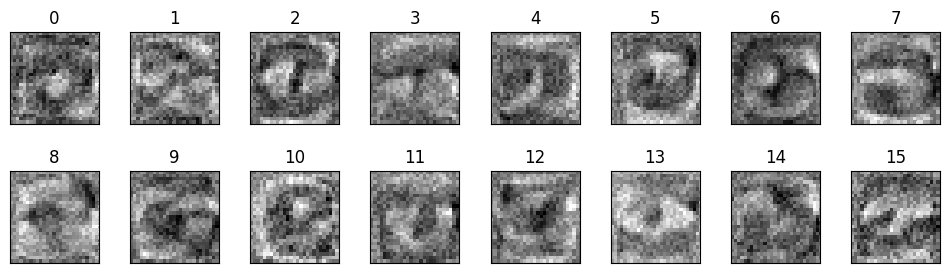

In [10]:
# 1층째의 가중치 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], '')
    plt.yticks([], '')
    plt.title('%d' % i)
plt.show()

ReLU 네트워크가 학습 후 획득한 입력부터 중간층 뉴런까지의 가중치
- 검은 부분이 양의 값, 흰색 부분이 음의 값
- 검은 부분에 입력 이미지가 있으면 그 유닛은 활성화
- 흰색 부분에 입력 이미지가 있는 유닛은 억제됨

➡️ 현재 모델은 '입력은 2차원 이미지'라는 공간 정보를 전혀 사용하지 않음
- 네트워크 구조가 전결합형이며 모든 입력 성분은 대등한 관계이기 때문
- 이웃에 있는 입력 성분도, 멀리 떨어진 성분도 수식상으로는 똑같은 관계

# 8.4 공간 필터

- 공간정보란? 직선, 곡선, 원형이나 사각형 같은 모양을 나타내는 정도
- 필터: 2차원 행렬로 표현됨
- 이미지와 필터: 합성곱 연산

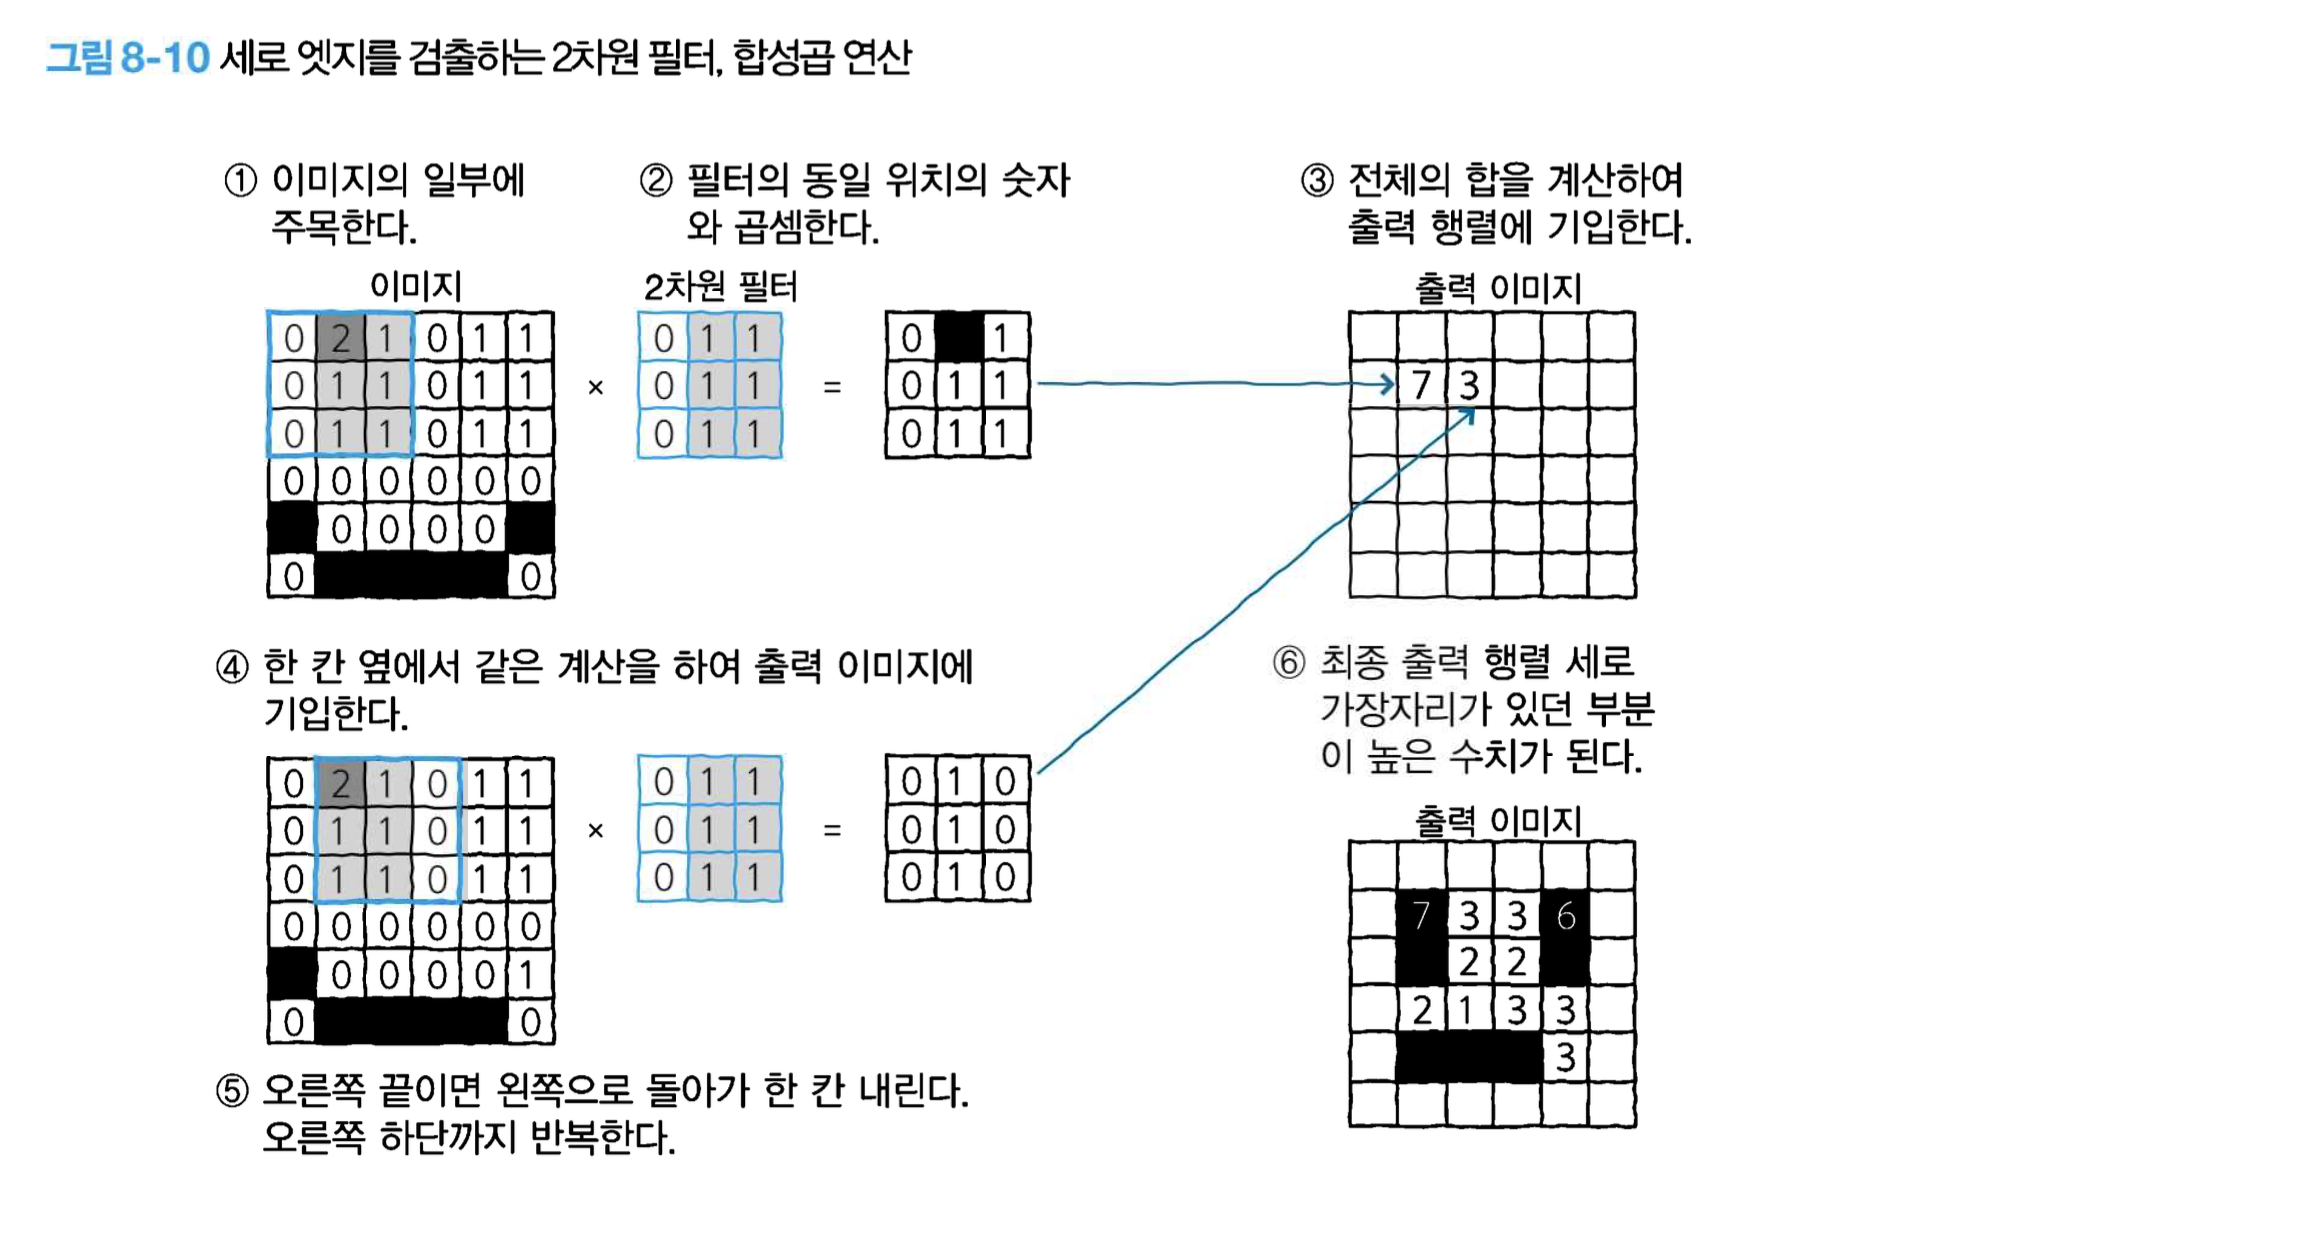

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

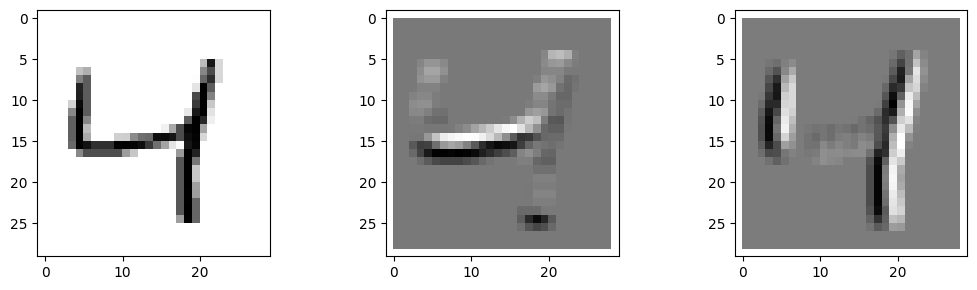

In [13]:
import matplotlib.pyplot as plt

id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# -- 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

*차례로 A, B, C*

- A: 기본 이미지
- B: 가로 라인의 아래쪽이 큰 값 (흰: 작, 검: 큰)
- C: 세로 라인의 왼쪽이 큰 값

→ 위에 사용한 필터는 모든 요소를 합하면 0이 되도록 디자인: 공간 구조가 없는 균일한 부분은 0으로 변환, 구조가 존재할 경우에는 0 이상의 값으로 변환됨 (0을 감지레벨의 기준으로 세울 수 있음)
</br></br>
필터를 적용하면 출력 이미지의 크기 작아짐 → 대응책: 패딩(padding)
</br></br>
패딩: 필터를 적용하기 전 0 등의 고정된 요소로 주위를 부풀려두는 방법 </br>
스트라이드: 필터의 전진 간격, 스트라이드 커지면 출력 이미지 작아짐

# 8.5 합성곱 신경망
- 필터 8장을 사용한 간단한 CNN 구현
- 크기 3*3, 패딩 1, 스트라이드 1

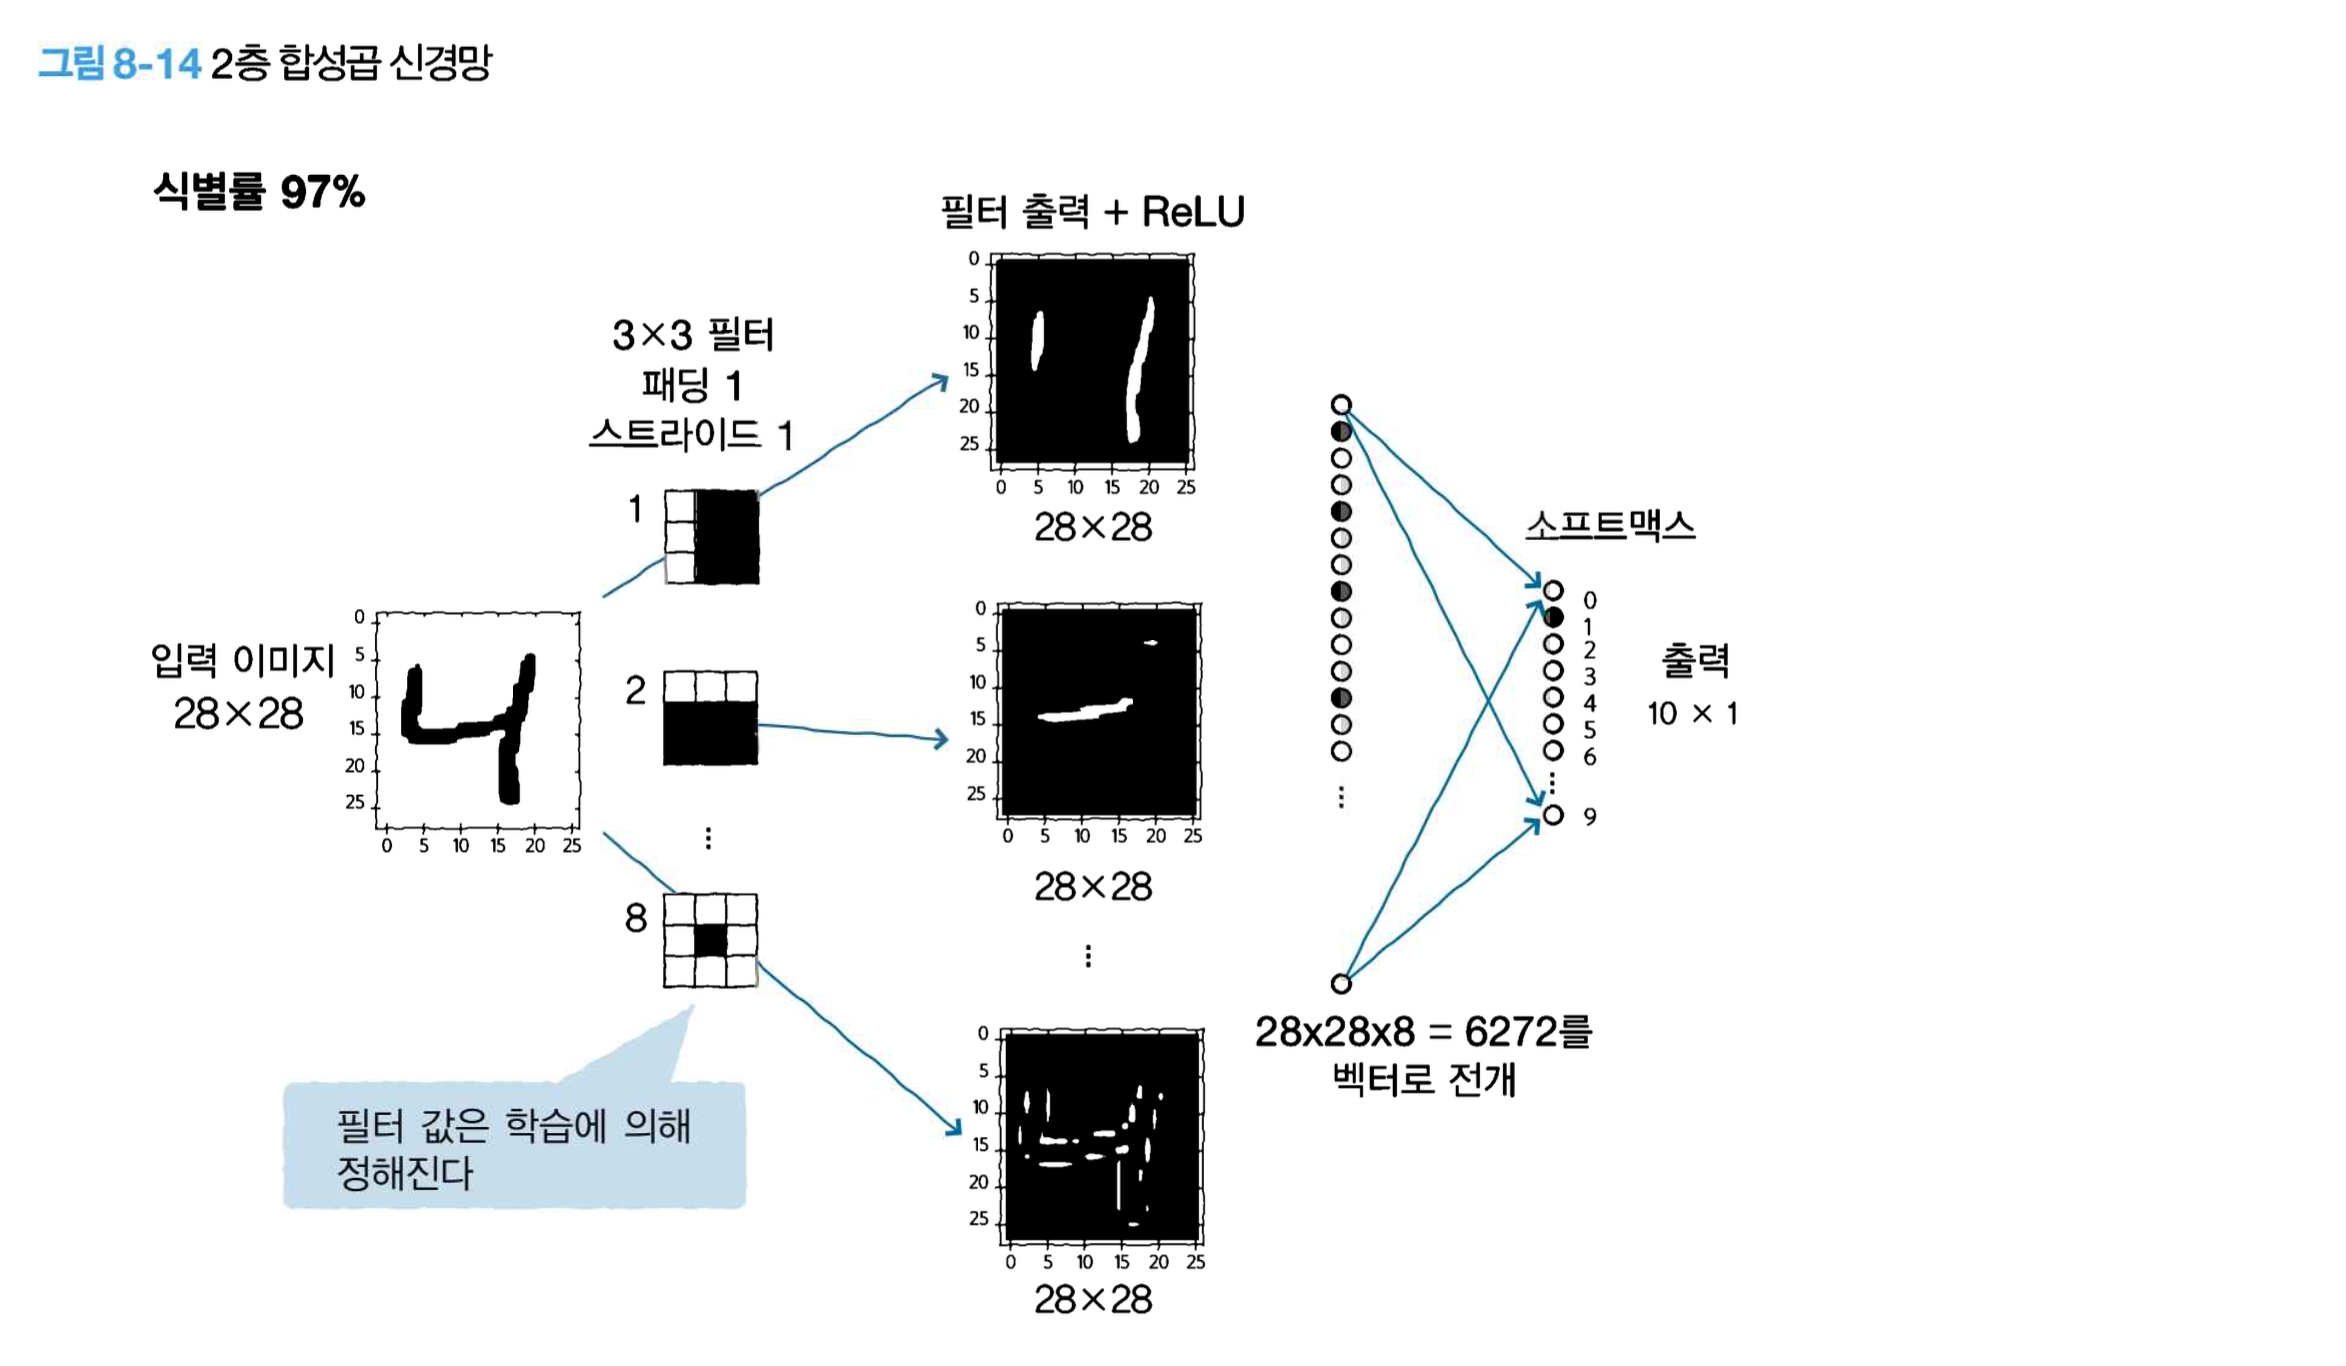

In [14]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                   input_shape=(28, 28, 1), activation='relu')) # (A)
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Computation time: {0:.3f} sec'.format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 15ms/step - loss: 0.7740 - accuracy: 0.8111 - val_loss: 0.3401 - val_accuracy: 0.9077
Epoch 2/20
60/60 [==============================] - 0s 8ms/step - loss: 0.3099 - accuracy: 0.9121 - val_loss: 0.2633 - val_accuracy: 0.9246
Epoch 3/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2483 - accuracy: 0.9294 - val_loss: 0.2197 - val_accuracy: 0.9409
Epoch 4/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2066 - accuracy: 0.9418 - val_loss: 0.1844 - val_accuracy: 0.9500
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1745 - accuracy: 0.9510 - val_loss: 0.1612 - val_accuracy: 0.9565
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1511 - accuracy: 0.9580 - val_loss: 0.1429 - val_accuracy: 0.9621
Epoch 7/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1346 - accuracy: 0.9629 - val_loss: 0.1292 - val_accuracy: 0.9635
Epoch 8/20
60/60 [=

(A)
- 3*3 필터, 8개 사용
- padding='same': 출력의 크기가 변하지 않도록 패딩을 추가해 처리
- 바이어스: 각 필터에 1변수씩 할당, 필터 학습 전의 초기값 임의 설정됨, 바이어스의 초기값은 0

(B)
- 합성곱층의 출력 4차원 (배치 수, 필터 수, 출력 이미지의 세로폭, 출력 이미지의 가로폭)
- Dense에 넣으려면 2차원으로 바꿔야함 (배치 수, 필터 수\*출력 이미지 세로 폭\*출력 이미지 가로 폭)

➡️ ReLU 네트워크보다 개선된 출력을 확인 할 수 있음

In [15]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, '%d' % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], '')
        plt.yticks([], '')

313/313 [==============================] - 1s 2ms/step


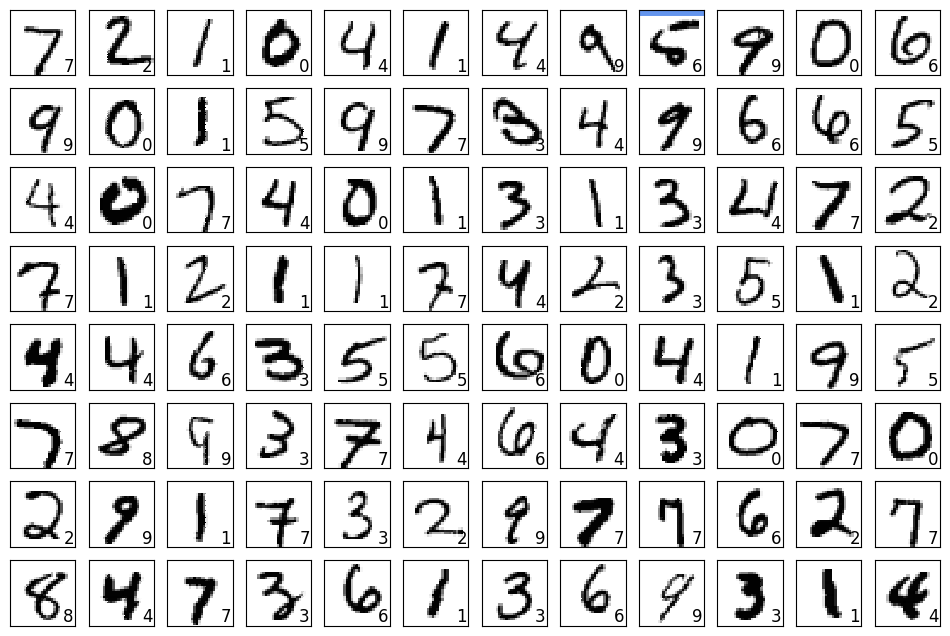

In [16]:
show_prediction()
plt.show()

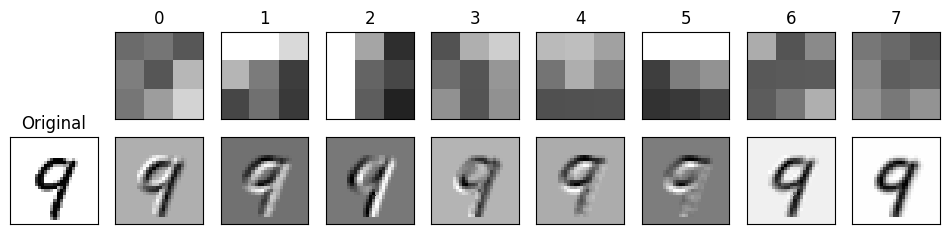

In [17]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], '')
plt.yticks([], '')
plt.title('Original')
w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], '')
    plt.yticks([], '')
    plt.title('%d' % i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h-3):
        for iw in range(img_w-3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] =\
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], '')
    plt.yticks([], '')
plt.show()

# 8.6 풀링

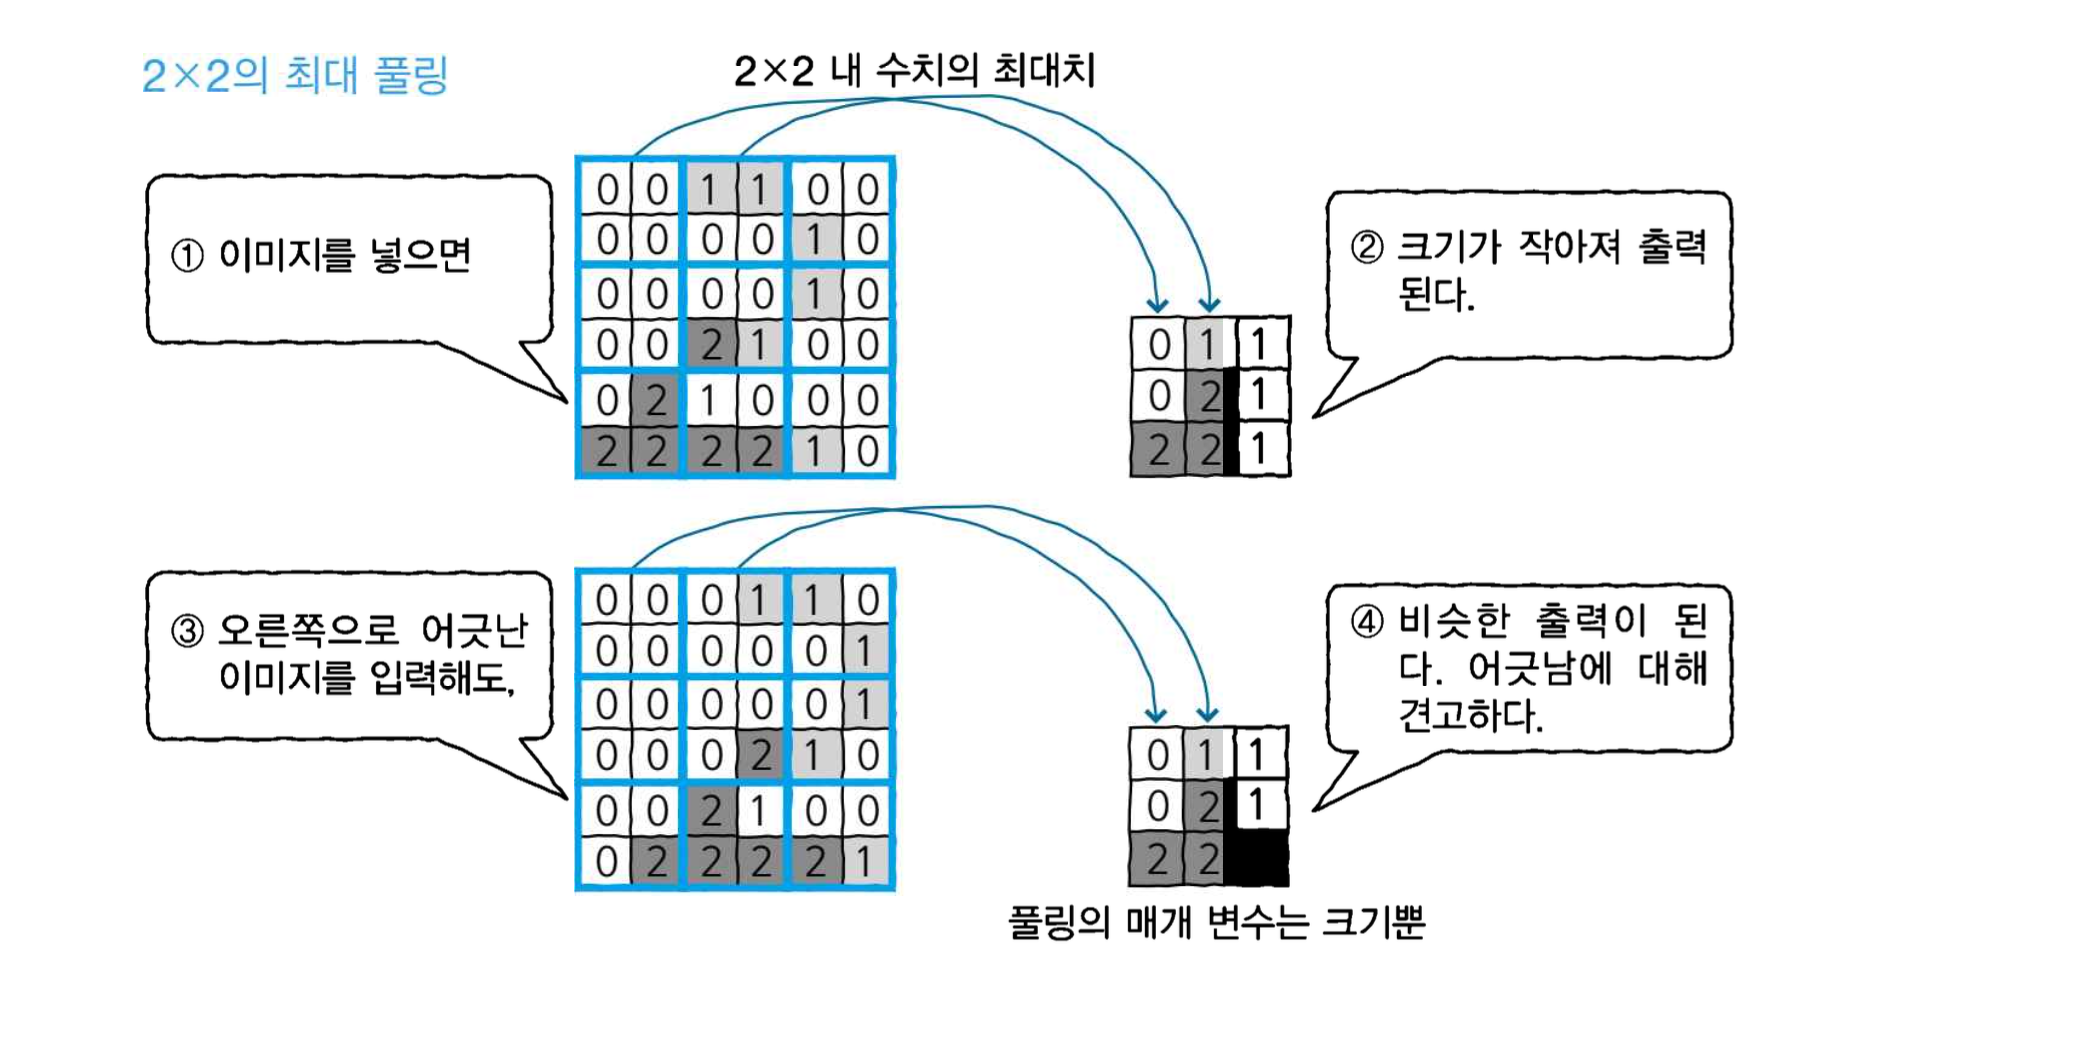

- Max pooling, Average pooling

# 8.7 드롭아웃

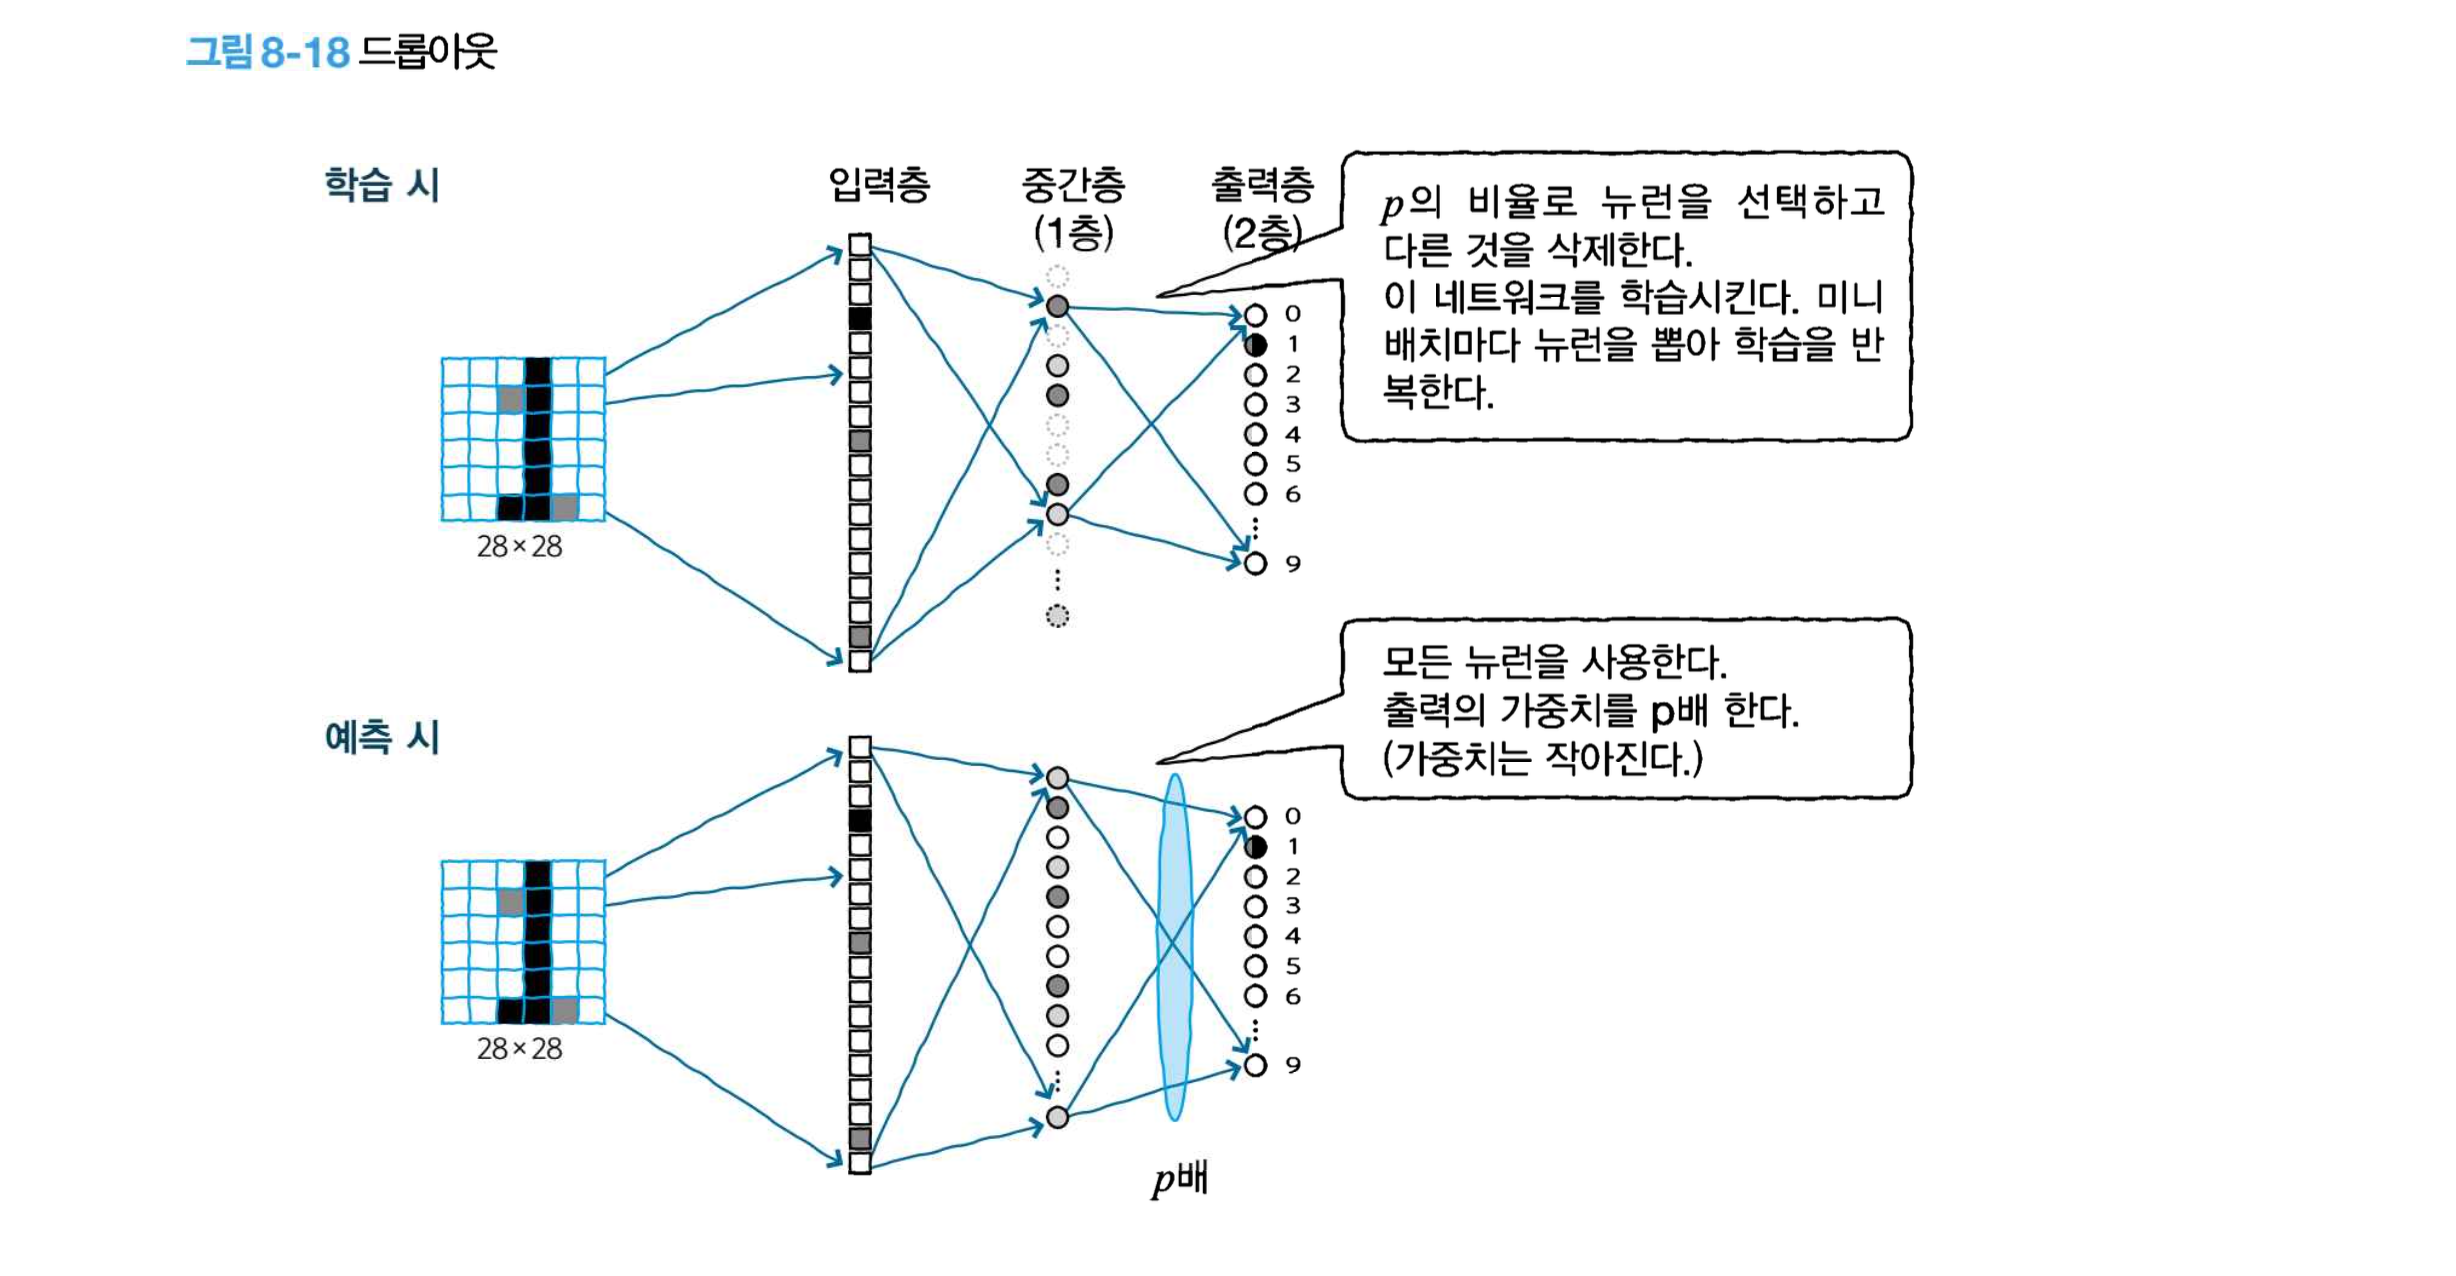

드롭아웃은 여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과가 있음 (앙상블)

# 8.8 MNIST 인식 네트워크 모델

In [18]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

num_classes = 10

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Computation time: {0:.3f} sec' .format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 9s 33ms/step - loss: 0.6745 - accuracy: 0.7966 - val_loss: 0.1242 - val_accuracy: 0.9637
Epoch 2/20
60/60 [==============================] - 2s 31ms/step - loss: 0.1301 - accuracy: 0.9596 - val_loss: 0.0606 - val_accuracy: 0.9808
Epoch 3/20
60/60 [==============================] - 2s 37ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.0431 - val_accuracy: 0.9860
Epoch 4/20
60/60 [==============================] - 3s 46ms/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 0.0377 - val_accuracy: 0.9866
Epoch 5/20
60/60 [==============================] - 2s 35ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0319 - val_accuracy: 0.9886
Epoch 6/20
60/60 [==============================] - 2s 35ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0269 - val_accuracy: 0.9913
Epoch 7/20
60/60 [==============================] - 2s 36ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 8/20
60

- 최대 풀링층 (A), (B)
- 드롭 아웃층 (C), (D): 0.25는 남은 뉴런의 비율

313/313 [==============================] - 2s 4ms/step


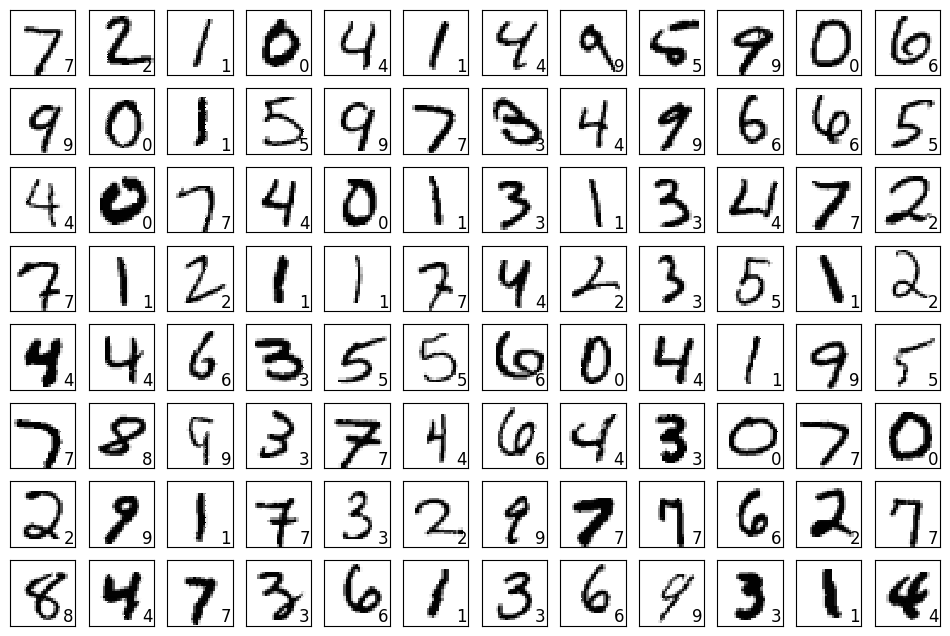

In [19]:
show_prediction()
plt.show()